# Main Analysis

In [1]:
from pathlib import *
import csv
import sqlalchemy as sa
import numpy as np
import pandas as pd
import axelrod as axl
import random
import matplotlib.pyplot as plt
%matplotlib inline

Size of Database as of writing: 

In [2]:
path_for_images = Path("../../images/folk_thm/main_analysis/")
path_for_images.mkdir(parents=True, exist_ok=True)

database_management_sys = sa.create_engine("sqlite:///../database-code/data/se/main.db")
connect_dbms_to_db = database_management_sys.connect()
se_folk_thm_data = pd.read_sql("folk_theorem_experiment", connect_dbms_to_db)
len(se_folk_thm_data), max(se_folk_thm_data["tournament_player_set"])

(825700, 159)

## p-Thresholds

Looking at the probabilities of the game ending for all the games (ignoring whether the games are degenerate or not)

In [3]:
p_thresh_data = pd.read_csv("..\database-code\data\prob_end_threshold\main-new.csv")
p_thresh_data.head(), len(p_thresh_data)

(   number_of_players  tournament_player_set  noise      min_p_threshold  \
 0                  2                      0    0.0  0.28326262626262627   
 1                  2                      0    0.1  0.17237373737373737   
 2                  2                      0    0.2                 None   
 3                  2                      0    0.3                 None   
 4                  2                      0    0.4                 None   
 
       mean_p_threshold   median_p_threshold      max_p_threshold  
 0  0.28326262626262627  0.28326262626262627  0.28326262626262627  
 1  0.17237373737373737  0.17237373737373737  0.17237373737373737  
 2                 None                 None                 None  
 3                 None                 None                 None  
 4                 None                 None                 None  , 1749)

In [4]:
len(p_thresh_data[p_thresh_data["min_p_threshold"] == "None"]), len(p_thresh_data[p_thresh_data["mean_p_threshold"] == "None"]), len(p_thresh_data[p_thresh_data["median_p_threshold"] == "None"]), len(p_thresh_data[p_thresh_data["max_p_threshold"] == "None"])

(276, 276, 276, 276)

In [5]:
for p_type in ["min_p_threshold", "mean_p_threshold", "median_p_threshold", "max_p_threshold"]:
    p_thresh_data = p_thresh_data.drop(p_thresh_data[p_thresh_data[p_type] == "None"].index, 0)
p_thresh_data.dtypes

number_of_players          int64
tournament_player_set      int64
noise                    float64
min_p_threshold           object
mean_p_threshold          object
median_p_threshold        object
max_p_threshold           object
dtype: object

In [6]:
p_thresh_data = p_thresh_data.astype({"min_p_threshold": float, "mean_p_threshold": float, "median_p_threshold": float, "max_p_threshold": float,})
p_thresh_data.head(), len(p_thresh_data)

(   number_of_players  tournament_player_set  noise  min_p_threshold  \
 0                  2                      0    0.0         0.283263   
 1                  2                      0    0.1         0.172374   
 6                  2                      0    0.6         1.000000   
 7                  2                      0    0.7         1.000000   
 8                  2                      0    0.8         1.000000   
 
    mean_p_threshold  median_p_threshold  max_p_threshold  
 0          0.283263            0.283263         0.283263  
 1          0.172374            0.172374         0.172374  
 6          1.000000            1.000000         1.000000  
 7          1.000000            1.000000         1.000000  
 8          1.000000            1.000000         1.000000  , 1473)

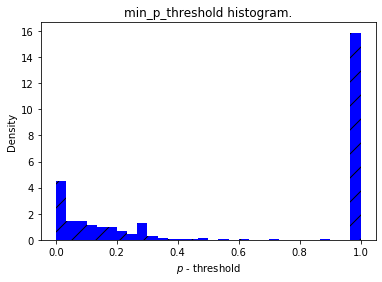

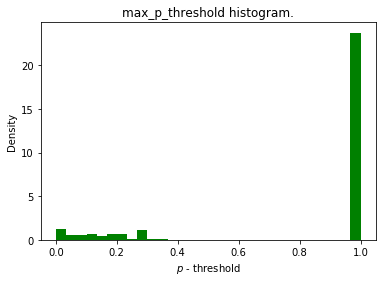

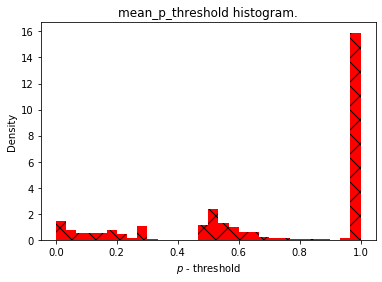

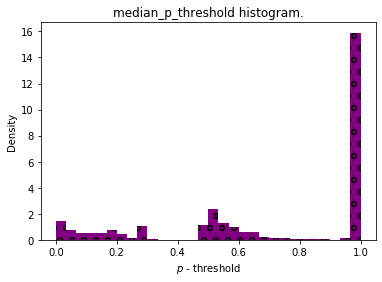

In [29]:
p_thresholds = ["min_p_threshold", "max_p_threshold", "mean_p_threshold", "median_p_threshold"]
colours = ["blue", "green", "red", "purple"]
hatches = ["/", " ", "x", "o"]
for p_threshold, colour, hatch in zip(p_thresholds, colours, hatches):
    hist_file_name = str(p_threshold) + "_hist.pdf"
    hist_path = path_for_images / hist_file_name
    p_thresh_plot = plt.figure()
    axes = p_thresh_plot.add_subplot(1, 1, 1)
    axes.set_ylabel("Density")
    axes.set_xlabel("$p$ - threshold")
    axes.set_title(str(p_threshold) + " histogram.")
    axes.hist(p_thresh_data[p_threshold], bins=30, color=colour, hatch=hatch, density=True)
    p_thresh_plot.savefig(str(hist_path))

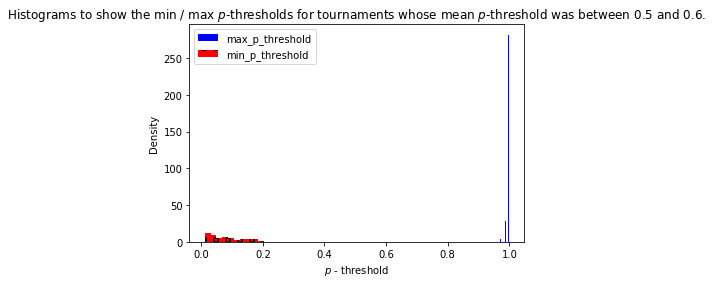

In [32]:
p_mean_middle_data = p_thresh_data[(p_thresh_data["mean_p_threshold"] <= 0.6) & (p_thresh_data["mean_p_threshold"] >= 0.5)]

p_mean_middle_data_plot_path = path_for_images / "p_mean_middle_data_plot.pdf"

p_mean_middle_data_plot = plt.figure()
axes = p_mean_middle_data_plot.add_subplot(1, 1, 1)
axes.set_ylabel("Density")
axes.set_xlabel("$p$ - threshold")
axes.set_title("Histograms to show the min / max $p$-thresholds for tournaments whose mean $p$-threshold was between 0.5 and 0.6.")
axes.hist(p_mean_middle_data["max_p_threshold"], bins=10, color="blue", hatch=" ", density=True, label="max_p_threshold")
axes.hist(p_mean_middle_data["min_p_threshold"], bins=10, color="red", hatch = "o", density=True, label="min_p_threshold")
axes.legend()
p_mean_middle_data_plot.savefig(str(p_mean_middle_data_plot_path))

In [16]:
random.sample(list(p_mean_middle_data["tournament_player_set"]), 3)

[105, 35, 33]

Looking at the probabilities of the game ending for all the games which are definitely non-degenerate.

In [18]:
p_thresh_data_no_degeneracy = pd.read_csv("..\database-code\data\prob_end_threshold\main_no_degeneracy-new.csv")
p_thresh_data_no_degeneracy.head(), 

(   number_of_players  tournament_player_set  noise      min_p_threshold  \
 0                  2                      0    0.0  0.28326262626262627   
 1                  2                      0    0.1  0.17237373737373737   
 2                  2                      0    0.2                 None   
 3                  2                      0    0.3                 None   
 4                  2                      0    0.4                 None   
 
       mean_p_threshold   median_p_threshold      max_p_threshold  
 0  0.28326262626262627  0.28326262626262627  0.28326262626262627  
 1  0.17237373737373737  0.17237373737373737  0.17237373737373737  
 2                 None                 None                 None  
 3                 None                 None                 None  
 4                 None                 None                 None  ,)

In [19]:
len(p_thresh_data_no_degeneracy[p_thresh_data_no_degeneracy["min_p_threshold"] == "None"]), len(p_thresh_data_no_degeneracy[p_thresh_data_no_degeneracy["mean_p_threshold"] == "None"]), len(p_thresh_data_no_degeneracy[p_thresh_data_no_degeneracy["median_p_threshold"] == "None"]), len(p_thresh_data_no_degeneracy[p_thresh_data_no_degeneracy["max_p_threshold"] == "None"])

(275, 275, 275, 275)

In [20]:
for p_type in ["min_p_threshold", "mean_p_threshold", "median_p_threshold", "max_p_threshold"]:
    p_thresh_data_no_degeneracy = p_thresh_data_no_degeneracy.drop(p_thresh_data_no_degeneracy[p_thresh_data_no_degeneracy[p_type] == "None"].index, 0)
p_thresh_data_no_degeneracy.dtypes

number_of_players          int64
tournament_player_set      int64
noise                    float64
min_p_threshold           object
mean_p_threshold          object
median_p_threshold        object
max_p_threshold           object
dtype: object

In [21]:
p_thresh_data_no_degeneracy = p_thresh_data_no_degeneracy.astype({"min_p_threshold": float, "mean_p_threshold": float, "median_p_threshold": float, "max_p_threshold": float,})
p_thresh_data_no_degeneracy.head(), len(p_thresh_data_no_degeneracy)

(   number_of_players  tournament_player_set  noise  min_p_threshold  \
 0                  2                      0    0.0         0.283263   
 1                  2                      0    0.1         0.172374   
 6                  2                      0    0.6         1.000000   
 7                  2                      0    0.7         1.000000   
 8                  2                      0    0.8         1.000000   
 
    mean_p_threshold  median_p_threshold  max_p_threshold  
 0          0.283263            0.283263         0.283263  
 1          0.172374            0.172374         0.172374  
 6          1.000000            1.000000         1.000000  
 7          1.000000            1.000000         1.000000  
 8          1.000000            1.000000         1.000000  , 1469)

In [22]:
len(p_thresh_data), len(p_thresh_data_no_degeneracy)

(1473, 1469)

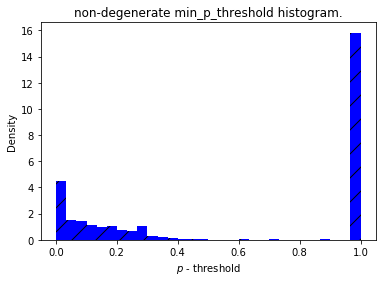

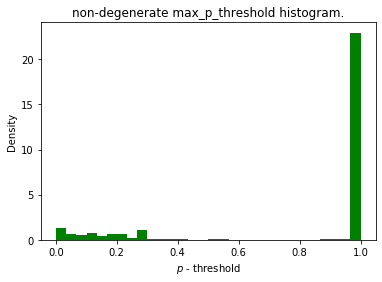

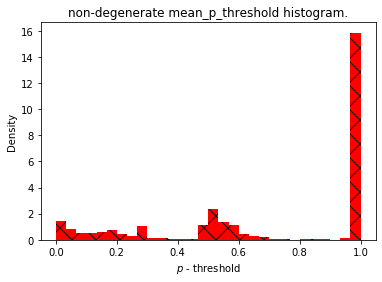

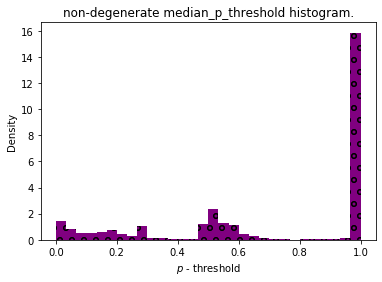

In [33]:
p_thresholds = ["min_p_threshold", "max_p_threshold", "mean_p_threshold", "median_p_threshold"]
colours = ["blue", "green", "red", "purple"]
hatches = ["/", " ", "x", "o"]
for p_threshold, colour, hatch in zip(p_thresholds, colours, hatches):
    hist_file_name = "non-degen_" + str(p_threshold) + "_hist.pdf"
    hist_path = path_for_images / hist_file_name
    p_thresh_plot = plt.figure()
    axes = p_thresh_plot.add_subplot(1, 1, 1)
    axes.set_ylabel("Density")
    axes.set_xlabel("$p$ - threshold")
    axes.set_title("non-degenerate " + str(p_threshold) + " histogram.")
    axes.hist(p_thresh_data_no_degeneracy[p_threshold], bins=30, color=colour, hatch=hatch, density=True)
    p_thresh_plot.savefig(str(hist_path))

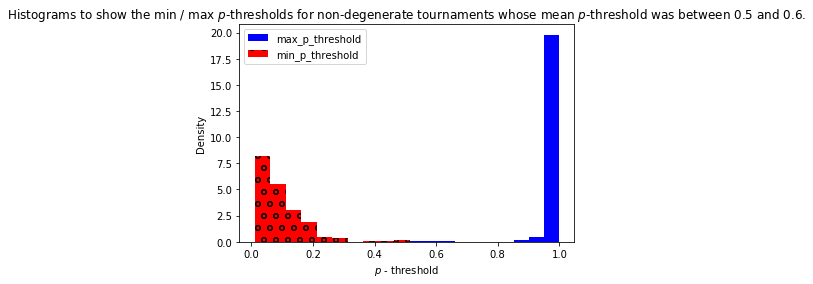

In [34]:
non_degen_p_mean_middle_data = p_thresh_data_no_degeneracy[(p_thresh_data_no_degeneracy["mean_p_threshold"] <= 0.6) & (p_thresh_data_no_degeneracy["mean_p_threshold"] >= 0.5)]

non_degen_p_mean_middle_data_plot_path = path_for_images / "non_degen_p_mean_middle_data_plot.pdf"

non_degen_p_mean_middle_data_plot = plt.figure()
axes = non_degen_p_mean_middle_data_plot.add_subplot(1, 1, 1)
axes.set_ylabel("Density")
axes.set_xlabel("$p$ - threshold")
axes.set_title("Histograms to show the min / max $p$-thresholds for non-degenerate tournaments whose mean $p$-threshold was between 0.5 and 0.6.")
axes.hist(non_degen_p_mean_middle_data["max_p_threshold"], bins=10, color="blue", hatch=" ", density=True, label="max_p_threshold")
axes.hist(non_degen_p_mean_middle_data["min_p_threshold"], bins=10, color="red", hatch="o", density=True, label="min_p_threshold")
axes.legend()
non_degen_p_mean_middle_data_plot.savefig(str(non_degen_p_mean_middle_data_plot_path))

### Effects of different number of players

Dealing with NON_DEGENERATE games

In [26]:
separated_player_dict = {}
for player_number in p_thresh_data_no_degeneracy["number_of_players"]:
    separated_player_dict[str(player_number)] = p_thresh_data_no_degeneracy[p_thresh_data_no_degeneracy["number_of_players"] == player_number]
separated_player_dict.keys()   

dict_keys(['2', '3', '4', '5', '6', '7', '8'])

C:\Users\sophi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\sophi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\sophi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max

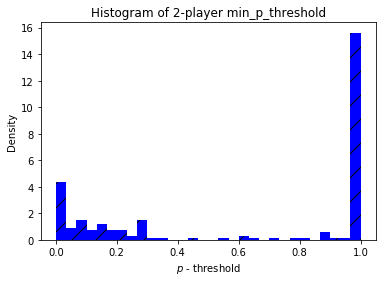

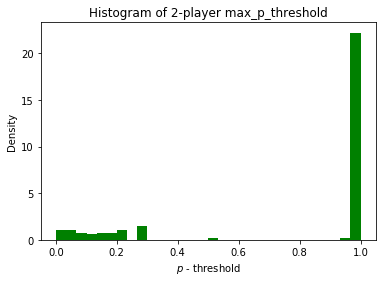

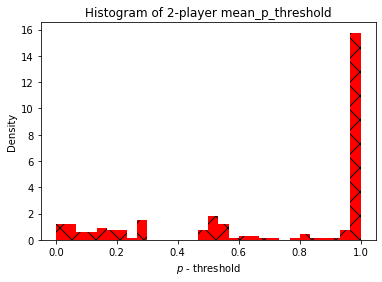

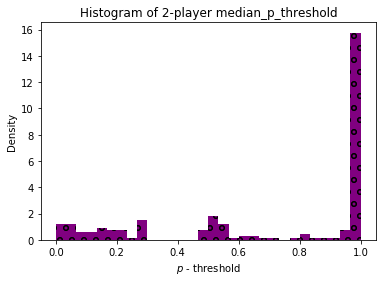

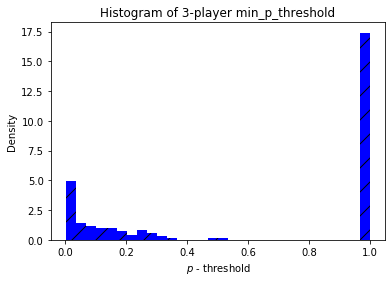

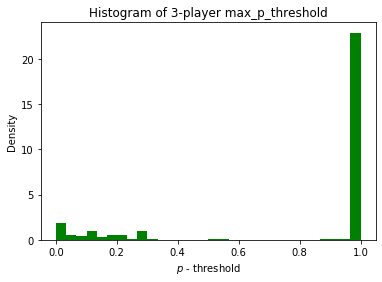

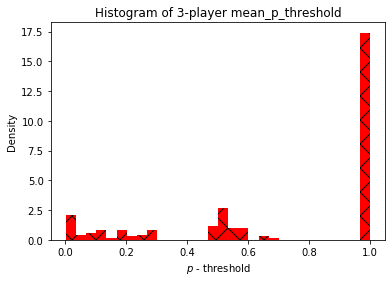

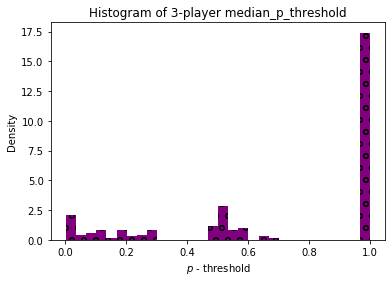

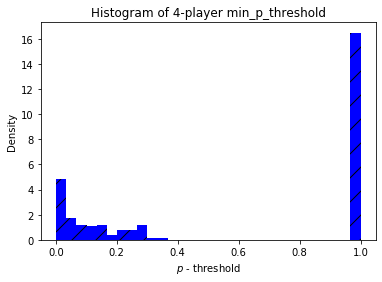

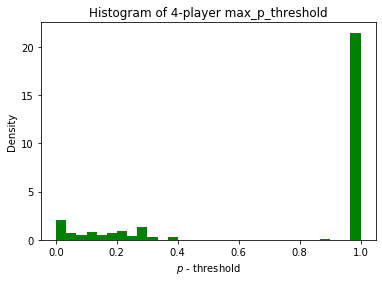

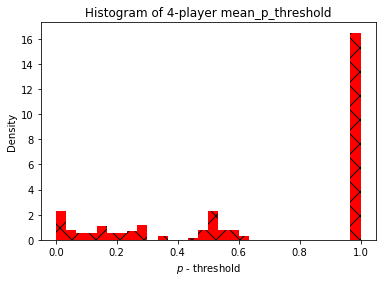

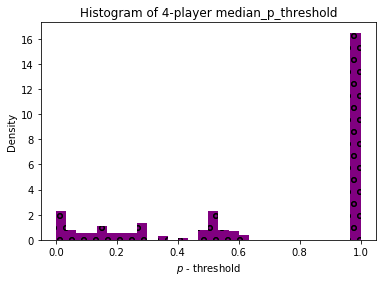

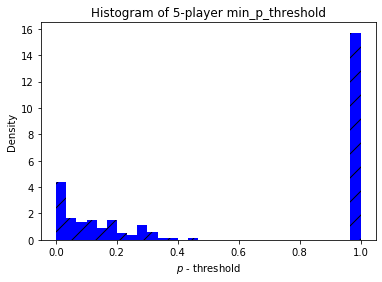

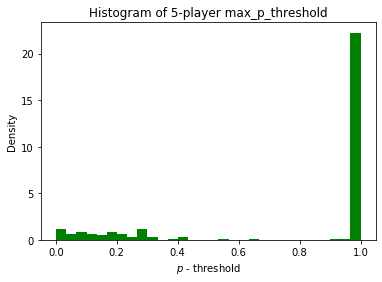

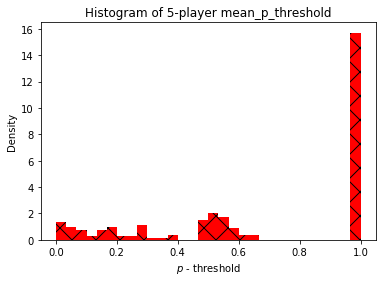

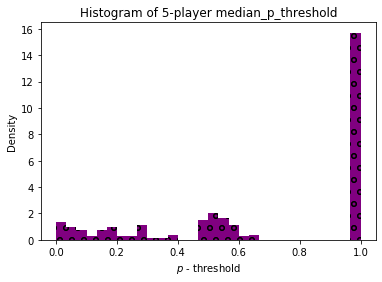

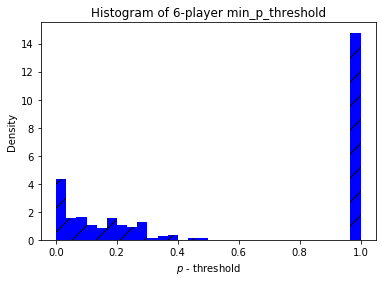

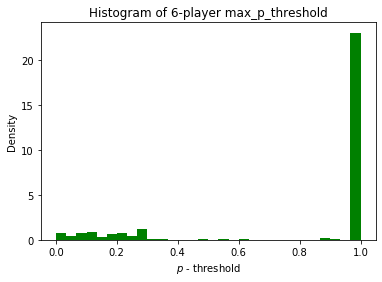

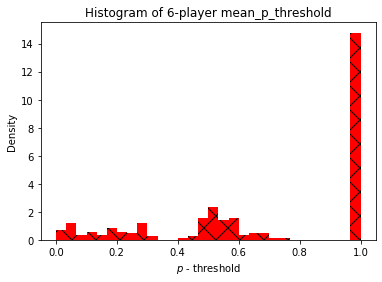

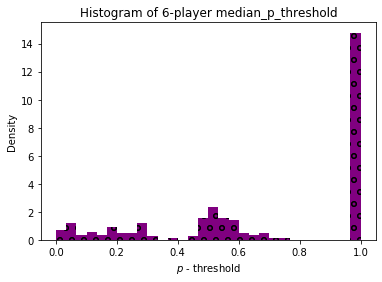

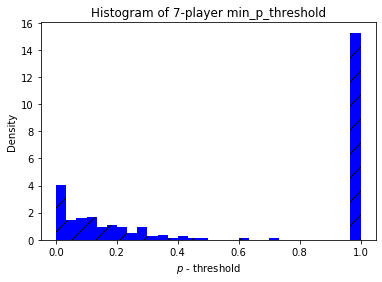

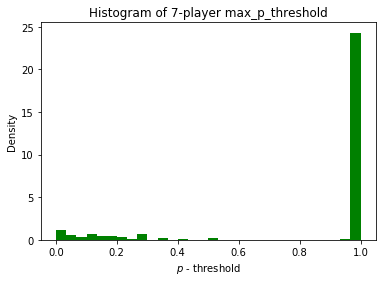

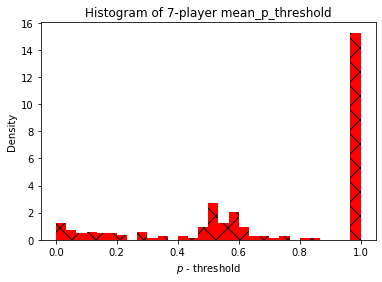

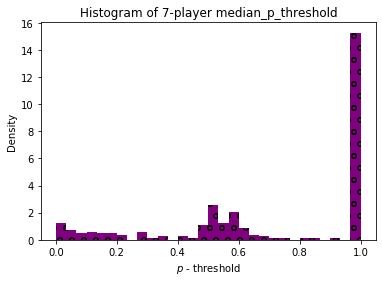

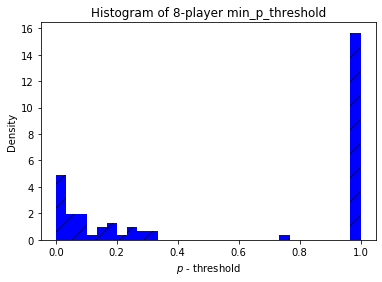

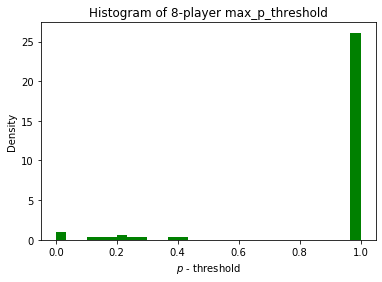

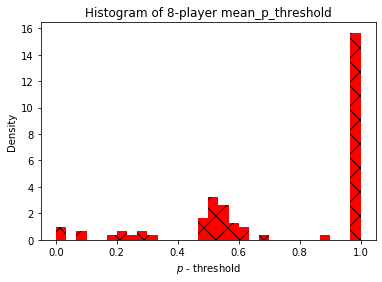

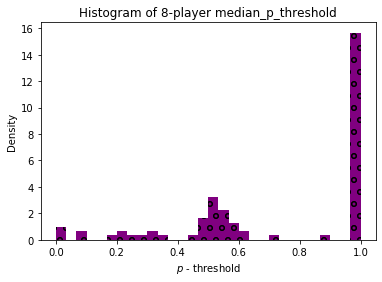

In [36]:
p_thresholds = ["min_p_threshold", "max_p_threshold", "mean_p_threshold", "median_p_threshold"]
colours = ["blue", "green", "red", "purple"]
hatches = ["/", " ", "x", "o"]
for player_number in separated_player_dict.keys():
    for p_threshold, colour, hatch in zip(p_thresholds, colours, hatches): 
        file_name = str(player_number) + "_player_" + str(p_threshold) + "_hist.pdf"
        player_p_thresh_plot_path = path_for_images / file_name
        player_p_thresh_plot = plt.figure()
        axes = player_p_thresh_plot.add_subplot(1, 1, 1)
        axes.set_ylabel("Density")
        axes.set_xlabel("$p$ - threshold")
        axes.set_title("Histogram of " + str(player_number) + "-player " + str(p_threshold))
        axes.hist(separated_player_dict[str(player_number)][p_threshold], bins=30, color=colour, hatch=hatch, density=True)
        player_p_thresh_plot.savefig(str(player_p_thresh_plot_path))
print("Finished!")

In [40]:
for key in separated_player_dict.keys():
    separated_player_dict[key].index = range(len(separated_player_dict[key]))
separated_player_dict.values()

dict_values([     number_of_players  tournament_player_set  noise  min_p_threshold  \
0                    2                      0    0.0         0.283263   
1                    2                      0    0.1         0.172374   
2                    2                      0    0.6         1.000000   
3                    2                      0    0.7         1.000000   
4                    2                      0    0.8         1.000000   
..                 ...                    ...    ...              ...   
195                  2                     24    0.5         0.031242   
196                  2                     24    0.6         0.142131   
197                  2                     24    0.7         0.091727   
198                  2                     24    0.8         0.132051   
199                  2                     24    0.9         0.253020   

     mean_p_threshold  median_p_threshold  max_p_threshold  
0            0.283263            0.283263        

In [45]:
separated_player_dict["4"]["min_p_threshold"]

0      0.222778
1      0.172374
2      0.081646
3      0.011081
4      0.001000
         ...   
219    1.000000
220    1.000000
221    1.000000
222    1.000000
223    1.000000
Name: min_p_threshold, Length: 224, dtype: float64

In [65]:
min_p_threshold, max_p_threshold, mean_p_threshold, median_p_threshold = [], [], [], []
for key in separated_player_dict.keys():
    min_p_threshold.append(separated_player_dict[key]["min_p_threshold"])
    max_p_threshold.append(separated_player_dict[key]["max_p_threshold"])
    mean_p_threshold.append(separated_player_dict[key]["mean_p_threshold"])
    median_p_threshold.append(separated_player_dict[key]["median_p_threshold"])
min_p_threshold, max_p_threshold, mean_p_threshold, median_p_threshold

([0      0.283263
  1      0.172374
  2      1.000000
  3      1.000000
  4      1.000000
           ...   
  195    0.031242
  196    0.142131
  197    0.091727
  198    0.132051
  199    0.253020
  Name: min_p_threshold, Length: 200, dtype: float64, 0      0.101808
  1      0.001000
  2      0.001000
  3      0.061485
  4      1.000000
           ...   
  209    1.000000
  210    1.000000
  211    1.000000
  212    1.000000
  213    1.000000
  Name: min_p_threshold, Length: 214, dtype: float64, 0      0.222778
  1      0.172374
  2      0.081646
  3      0.011081
  4      0.001000
           ...   
  219    1.000000
  220    1.000000
  221    1.000000
  222    1.000000
  223    1.000000
  Name: min_p_threshold, Length: 224, dtype: float64, 0      0.283263
  1      0.172374
  2      0.031242
  3      0.001000
  4      0.001000
           ...   
  234    1.000000
  235    1.000000
  236    1.000000
  237    1.000000
  238    1.000000
  Name: min_p_threshold, Length: 239, dtype: float64

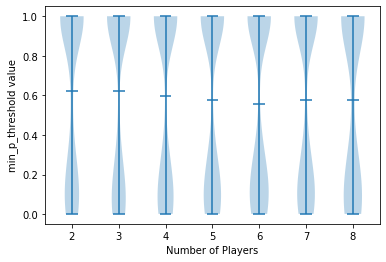

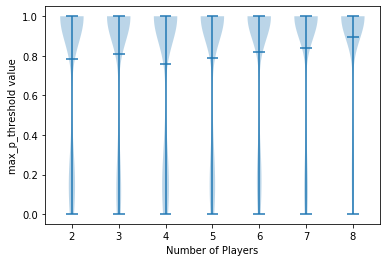

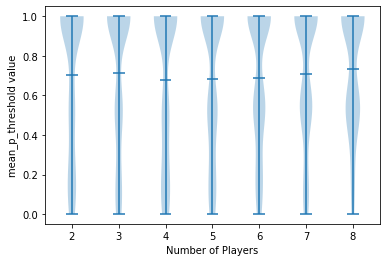

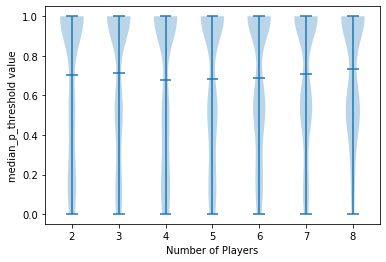

In [66]:
p_thresholds = ["min_p_threshold", "max_p_threshold", "mean_p_threshold", "median_p_threshold"]
p_thresholds_data = [min_p_threshold, max_p_threshold, mean_p_threshold, median_p_threshold]
for p_threshold, p_threshold_data in zip(p_thresholds, p_thresholds_data):
    violinplot_file_name = str(p_threshold) + "_player_violinplot.pdf"
    player_p_thresh_violin_path = path_for_images / violinplot_file_name
    player_p_thresh_violinplot = plt.figure()
    axes = player_p_thresh_violinplot.add_subplot(1, 1, 1)
    axes.set_xlabel("Number of Players")
    axes.set_xticks(np.arange(1, len(range(7))+1))
    axes.set_xticklabels(list(range(2, 9)))
    axes.set_ylabel(str(p_threshold) + " value")
    axes.violinplot(p_threshold_data, showmeans=True, showmedians=False)
    player_p_thresh_violinplot.savefig(str(player_p_thresh_violin_path))

### Effects of Noise

In [58]:
separated_noise_dict = {}
for amount_of_noise in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
    separated_noise_dict[str(amount_of_noise)] = p_thresh_data_no_degeneracy[p_thresh_data_no_degeneracy["noise"] == amount_of_noise]
separated_noise_dict.keys()

dict_keys(['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0'])

C:\Users\sophi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\sophi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\sophi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max

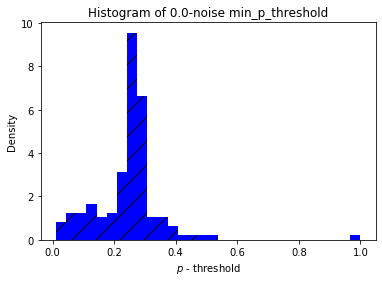

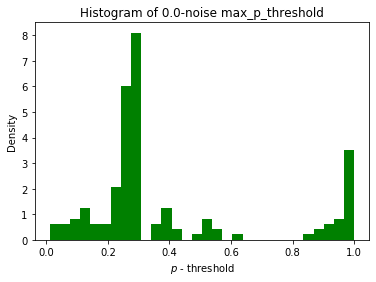

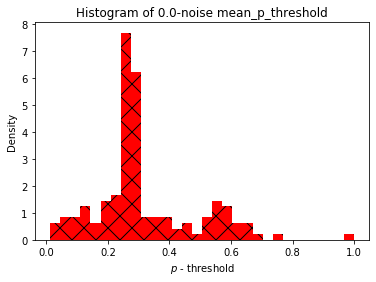

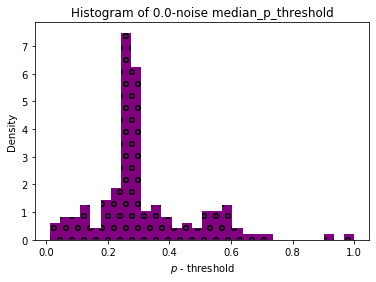

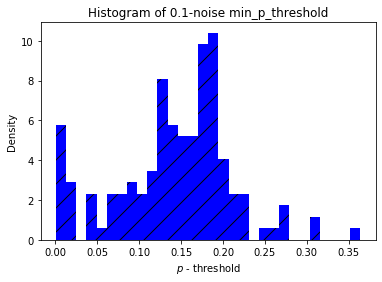

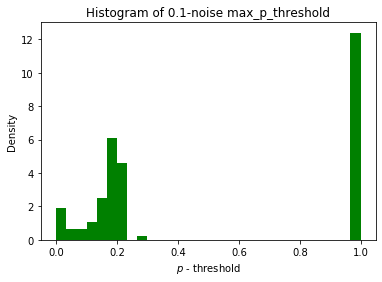

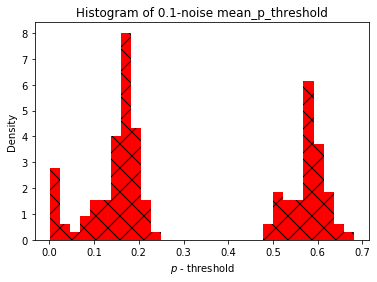

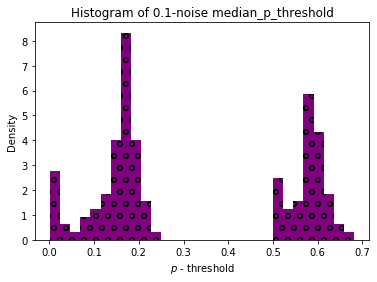

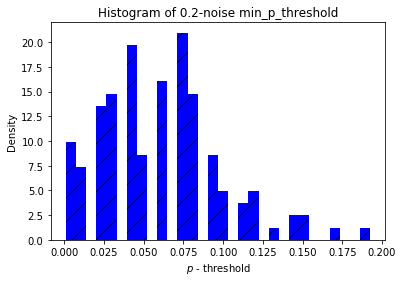

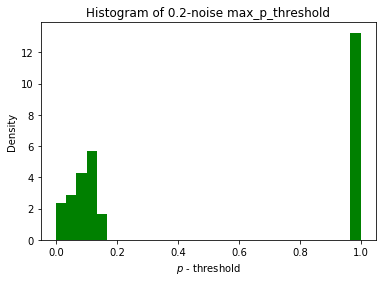

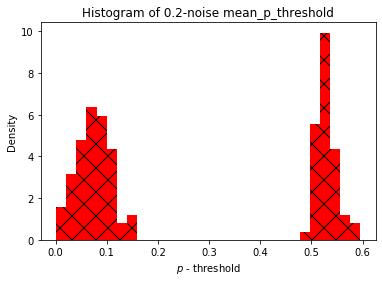

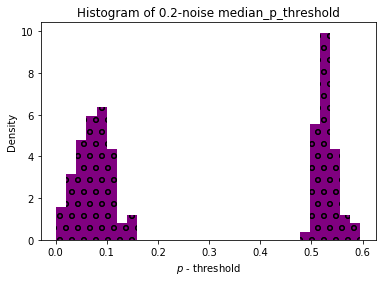

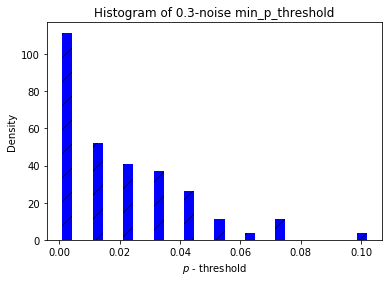

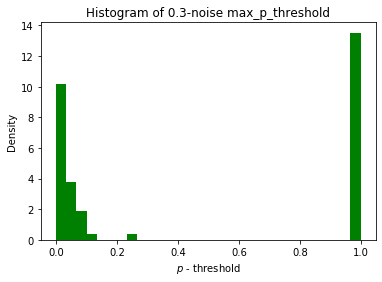

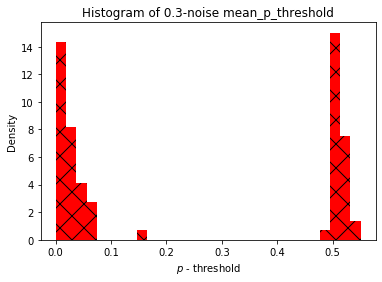

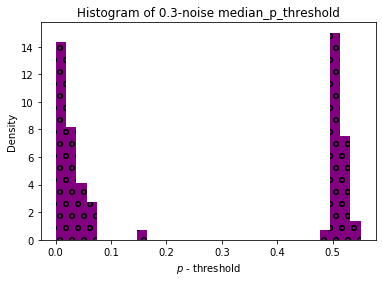

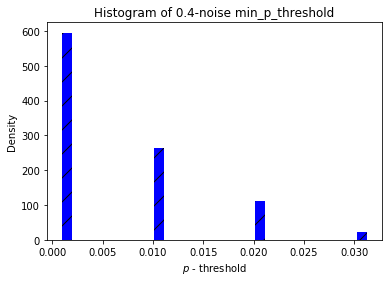

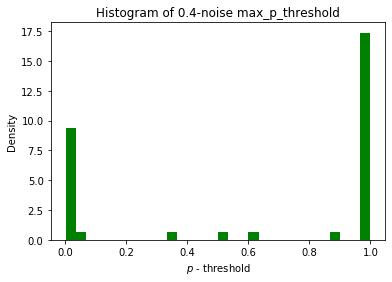

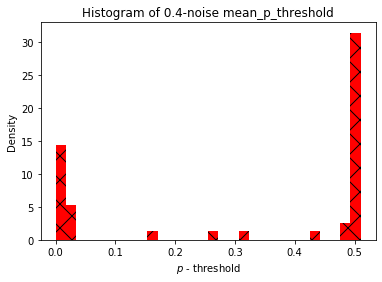

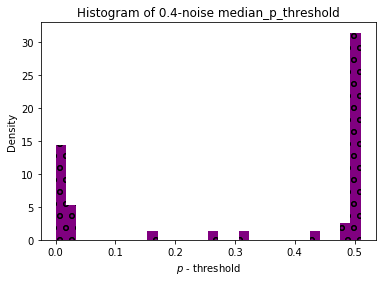

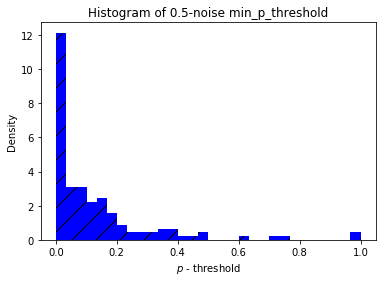

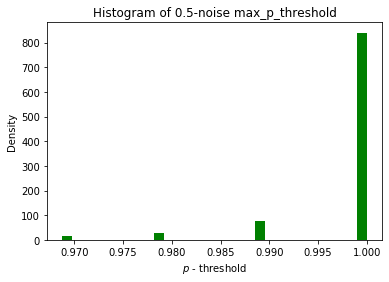

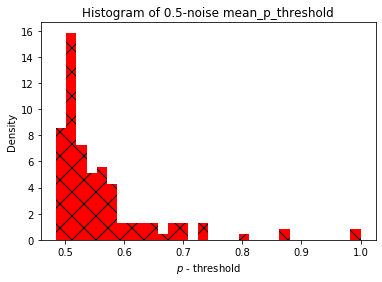

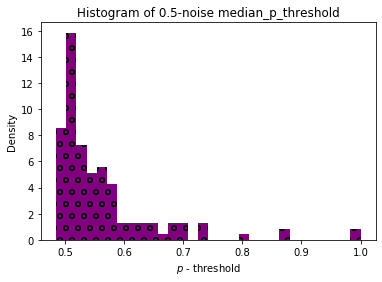

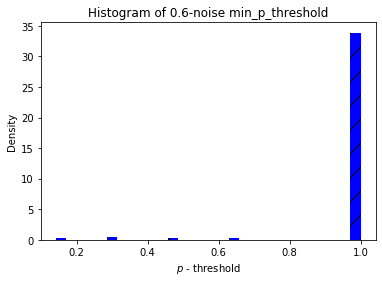

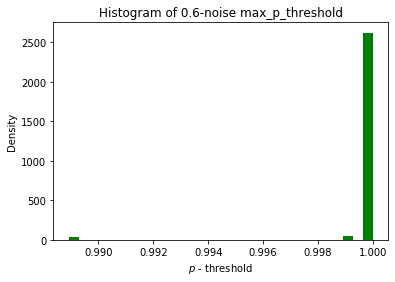

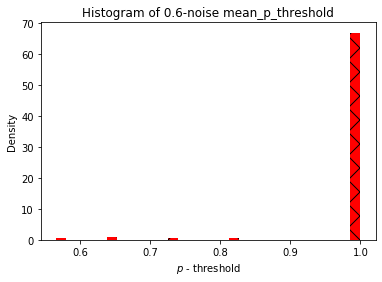

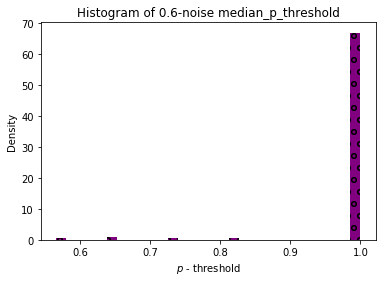

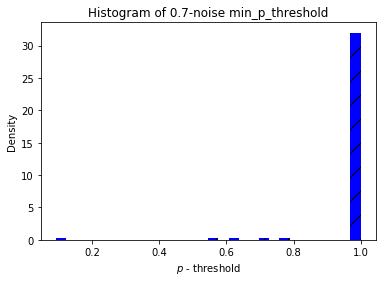

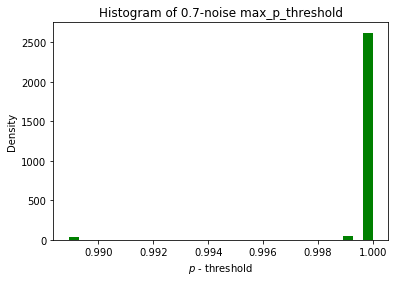

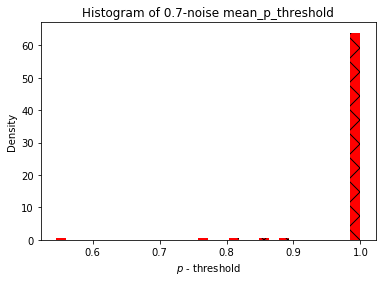

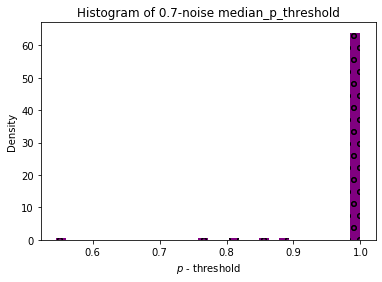

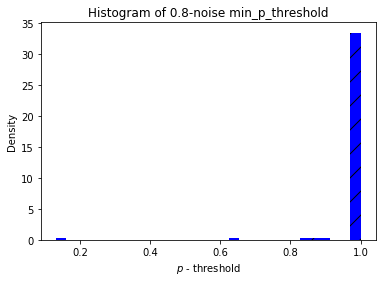

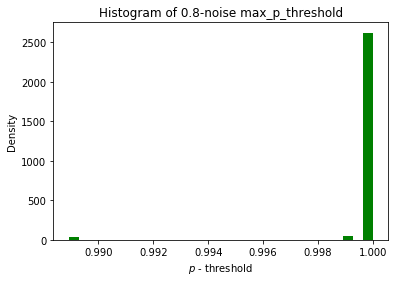

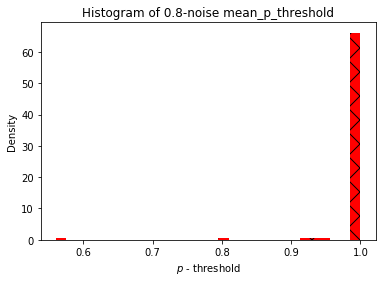

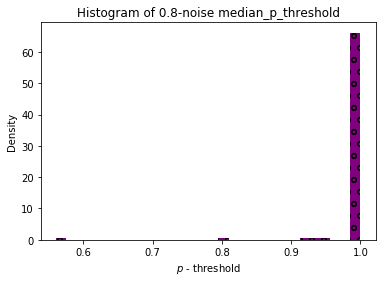

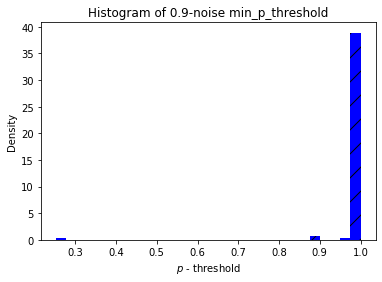

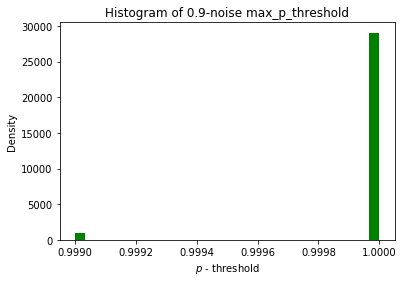

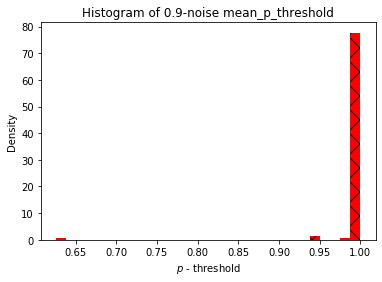

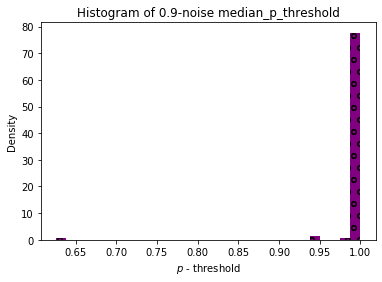

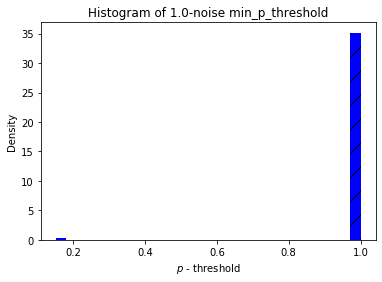

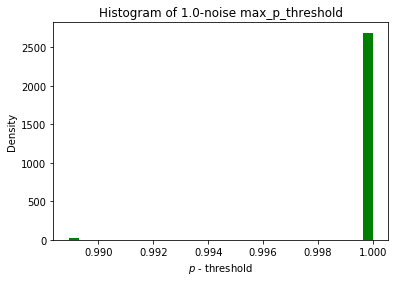

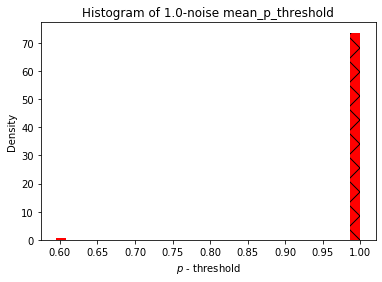

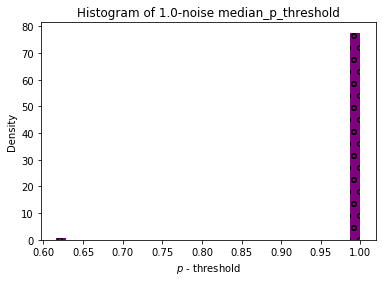

In [60]:
p_thresholds = ["min_p_threshold", "max_p_threshold", "mean_p_threshold", "median_p_threshold"]
colours = ["blue", "green", "red", "purple"]
hatches = ["/", " ", "x", "o"]
for amount_of_noise in separated_noise_dict.keys():
    for p_threshold, colour, hatch in zip(p_thresholds, colours, hatches): 
        file_name = str(amount_of_noise) + "_noise_" + str(p_threshold) + "_hist.pdf"
        noise_p_thresh_plot_path = path_for_images / file_name
        noise_p_thresh_plot = plt.figure()
        axes = noise_p_thresh_plot.add_subplot(1, 1, 1)
        axes.set_ylabel("Density")
        axes.set_xlabel("$p$ - threshold")
        axes.set_title("Histogram of " + str(amount_of_noise) + "-noise " + str(p_threshold))
        axes.hist(separated_noise_dict[str(amount_of_noise)][p_threshold], bins=30, color=colour, hatch=hatch, density=True)
        noise_p_thresh_plot.savefig(str(noise_p_thresh_plot_path))
print("Finished!")

In [61]:
for key in separated_noise_dict.keys():
    separated_noise_dict[key].index = range(len(separated_noise_dict[key]))
separated_noise_dict.values()

                 157    0.1         0.162293   
142                  8                    158    0.1         0.172374   

     mean_p_threshold  median_p_threshold  max_p_threshold  
0            0.172374            0.172374         0.172374  
1            0.147172            0.147172         0.162293  
2            0.202616            0.202616         0.202616  
3            0.162293            0.162293         0.172374  
4            0.132051            0.132051         0.142131  
..                ...                 ...              ...  
138          0.570566            0.570566         0.999000  
139          0.600808            0.600808         0.999000  
140          0.585687            0.585687         0.999000  
141          0.580646            0.580646         0.999000  
142          0.172374            0.172374         0.172374  

[143 rows x 7 columns],      number_of_players  tournament_player_set  noise  min_p_threshold  \
0                    2                      2   

In [69]:
min_p_threshold, max_p_threshold, mean_p_threshold, median_p_threshold = [], [], [], []
for key in separated_noise_dict.keys():
    min_p_threshold.append(separated_noise_dict[key]["min_p_threshold"])
    max_p_threshold.append(separated_noise_dict[key]["max_p_threshold"])
    mean_p_threshold.append(separated_noise_dict[key]["mean_p_threshold"])
    median_p_threshold.append(separated_noise_dict[key]["median_p_threshold"])
min_p_threshold, max_p_threshold, mean_p_threshold, median_p_threshold

([0      0.283263
  1      0.182455
  2      0.273182
  3      0.283263
  4      0.273182
           ...   
  141    1.000000
  142    0.061485
  143    0.313505
  144    0.303424
  145    0.263101
  Name: min_p_threshold, Length: 146, dtype: float64, 0      0.172374
  1      0.132051
  2      0.202616
  3      0.152212
  4      0.121970
           ...   
  138    0.142131
  139    0.202616
  140    0.172374
  141    0.162293
  142    0.172374
  Name: min_p_threshold, Length: 143, dtype: float64, 0      0.091727
  1      0.081646
  2      0.051404
  3      0.001000
  4      0.041323
           ...   
  122    0.061485
  123    0.081646
  124    0.031242
  125    0.041323
  126    0.051404
  Name: min_p_threshold, Length: 127, dtype: float64, 0     0.031242
  1     0.031242
  2     0.061485
  3     0.001000
  4     0.021162
          ...   
  75    0.001000
  76    0.031242
  77    0.001000
  78    0.031242
  79    0.001000
  Name: min_p_threshold, Length: 80, dtype: float64, 0     0.02

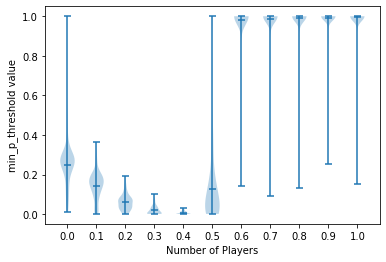

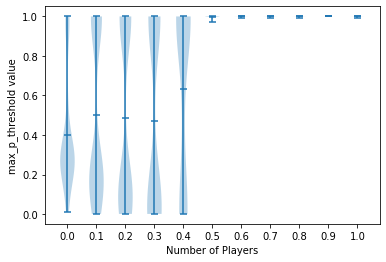

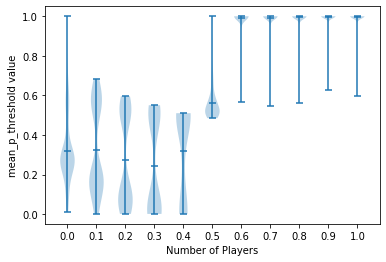

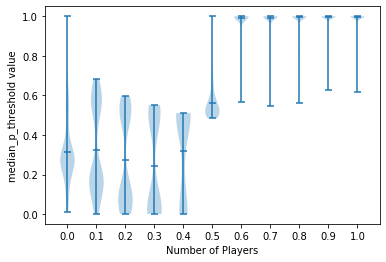

In [71]:
p_thresholds = ["min_p_threshold", "max_p_threshold", "mean_p_threshold", "median_p_threshold"]
p_thresholds_data = [min_p_threshold, max_p_threshold, mean_p_threshold, median_p_threshold]
for p_threshold, p_threshold_data in zip(p_thresholds, p_thresholds_data):
    violinplot_file_name = str(p_threshold) + "_noise_violinplot.pdf"
    noise_p_thresh_violin_path = path_for_images / violinplot_file_name
    noise_p_thresh_violinplot = plt.figure()
    axes = noise_p_thresh_violinplot.add_subplot(1, 1, 1)
    axes.set_xlabel("Number of Players")
    axes.set_xticks(np.arange(1, len(range(11))+1))
    axes.set_xticklabels([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
    axes.set_ylabel(str(p_threshold) + " value")
    axes.violinplot(p_threshold_data, showmeans=True, showmedians=False)
    noise_p_thresh_violinplot.savefig(str(player_p_thresh_violin_path))